<a href="https://colab.research.google.com/github/d-atallah/implicit_gender_bias/blob/main/07_Supervised_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, Download, & Variable Statements

In [ ]:
! pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
## Import & download statements
# General Statements
import pandas as pd
import string
import re
import joblib
import os
import numpy as np
import time
import shap
import matplotlib.pyplot as plt


# Feature selection & Model tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA, NMF
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, log_loss, make_scorer, average_precision_score

from xgboost import XGBClassifier

## Read Inputs

In [ ]:
# Variables
folder_path = '/home/gibsonce/datallah-jaymefis-gibsonce/'
model = 'xgb'

# Load DataFrames from pkl files
y_train = pd.read_pickle(folder_path + 'y_train.pkl')
y_test = pd.read_pickle(folder_path + 'y_test.pkl')
X_test = joblib.load(f'{folder_path}{model}_X_test.pkl')
X_train = joblib.load(f'{folder_path}{model}_X_train.pkl')
pipeline = joblib.load(f'{folder_path}{model}_pipeline.pkl')
shap_explainer = joblib.load(f'{folder_path}{model}_shap.pkl')
features = joblib.load(f'{folder_path}{model}_features.pkl')

## Feature Importance

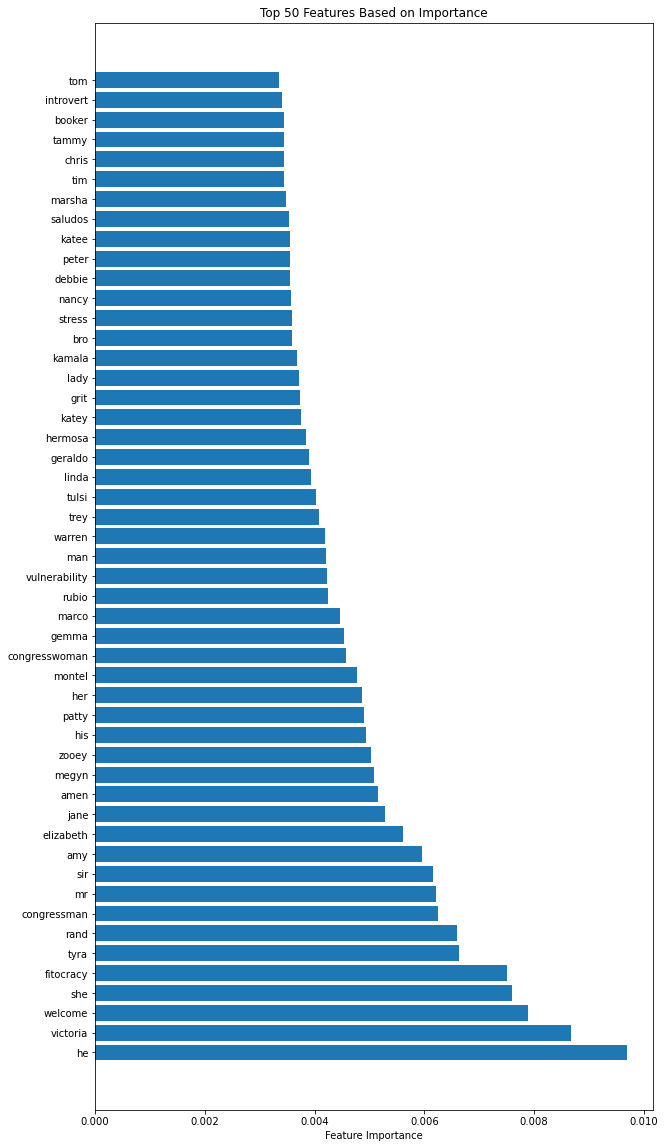

In [ ]:
feature_names, importance_values = zip(*features.items())

# Sort features based on importance values in descending order
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# Plot the top N features
top_n = 50
plt.figure(figsize=(10, 20))
plt.barh(range(top_n), sorted_importance_values[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features Based on Importance')
plt.show()